<a href="https://colab.research.google.com/github/gary464/Physics-Files/blob/main/Velocity_Adjusted_and_Mass_Adjusted_Animated_Particles_June_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100000
0.06242076198091017


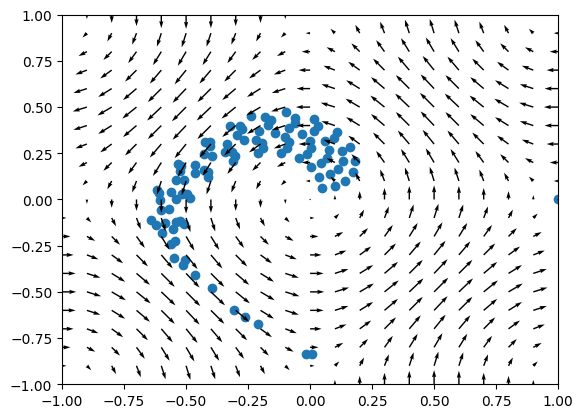

In [1]:

import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def g(t):
  return np.cos(math.pi * t / 25)
def u_x(x,y,t):
  return -np.sin(math.pi * y) * g(t)
def u_y(x,y,t):
  return np.sin(math.pi * x) * g(t)

# create a 1D grid of 100 particles in quadrant 1
x1D = np.linspace(0, 1, 10)
xx, yy = np.meshgrid(x1D, x1D)
# xx = np.squeeze(xx)
# yy = np.squeeze(yy)

# Shifts initial points to be between 0.05 and 0.50 grid
x0 = 0.05 + .45 * xx
y0 = 0.05 + .45 * yy

# time-step size
dt = .0005

# adjust the time-step size
FinalTime = 50
Nsteps = int(np.ceil(FinalTime / dt))
print(Nsteps)
dt = FinalTime / Nsteps

# save 50 steps (reducing saved data)
save_interval = Nsteps // 50

# Defining Variables
x = x0.flatten()
y = y0.flatten()
x_grid = x0
y_grid = y0
x_old = x
y_old = y
xx = x0
yy = y0
du_x = np.zeros(np.size(x))
du_y = np.zeros(np.size(y))
saved_x = [x]
saved_y = [y]
saved_du_x = [du_x]
saved_du_y = [du_y]
saved_t = [0]

#Include a mass factor to adjust du_x and dy_x
massfactor = 1

for i in range(Nsteps):
  u_x_old = du_x
  u_y_old = du_y

  t = (i) * dt
  u_x_new = u_x(x,y,t)
  u_y_new = u_y(x,y,t)
  #du_x = (u_x(x,y,t-dt)+u_x(x+u_x(x,y,t-dt),y+u_y(x,y,t-dt),t))/2
  #du_y = (u_y(x,y,t-dt)+u_x(x+u_x(x,y,t-dt),y+u_y(x,y,t-dt),t))/2
  du_x = (u_x(x,y,t)+u_x(x_old,y_old,t))/2
  du_y = (u_y(x,y,t)+u_y(x_old,y_old,t))/2
  #du_x = u_x(x,y,t)
  #du_y = u_y(x,y,t)
 # du_x = (u_x_new + u_x_old)/2
 # du_y = (u_y_new + u_y_old)/2
  x_old = x
  y_old = y

  x = x + massfactor * du_x * dt
  y = y + massfactor * du_y * dt

#  x = x + du_x * dt
#  y = y + du_y * dt

# This loop reduces the saved data to each of the 50 steps as set above
  if (i % save_interval) == 0 or (i == Nsteps):
    saved_x.append(x)
    saved_y.append(y)
    saved_du_x.append(du_x)
    saved_du_y.append(du_y)
    saved_t.append(t+dt)


#    print('On timestep ', i, ' out of ', Nsteps)

print((np.linalg.norm(x - x0.flatten()) + np.linalg.norm(y - y0.flatten())) / (np.linalg.norm(x0.flatten()) + np.linalg.norm(y0.flatten())))

# Beginning of Plot Animation

fig, axis = plt.subplots()

# setting up the update algorithm for the animation
def update(frames, saved_x, saved_y):

    axis.clear()  # clears previous data so only one set of particles shows at a time

# creating the grid for the quiver from -1 to 1 in both x and y

    xx = np.linspace(-1, 1,21)
    yy = np.linspace(-1, 1,21)

    XX,YY = np.meshgrid(xx,yy)

# Loop to create velocities at grid created above

    j =0
    saved_UX = []
    saved_UY = []
    while j<=20:

      ddu_x= u_x(XX[j],YY[j],g(saved_t[frames]))  # ddu_x= u_x(xx[j],yy[j],g(t))
      ddu_y= u_x(XX[j],YY[j],g(saved_t[frames]))
      saved_UX.append(ddu_x)
      saved_UY.append(ddu_y)

      UX = u_x(XX,YY,saved_t[frames])
      UY = u_y(XX,YY,saved_t[frames])
      j=j+1

#    saved_UX = np.array(saved_UX)
#    saved_UY = np.array(saved_UY)


    scatter_plot = plt.scatter(saved_x[frames], saved_y[frames])

 # Sets the axes for the scatterplot
    axis.set_xlim(-1,1)
    axis.set_ylim(-1,1)

#    plt.quiver(XX, YY, 0.2 * saved_UX, 0.2 * saved_UY)

    plt.quiver(XX, YY, 0.2 * u_x(XX, YY, saved_t[frames]), 0.2 * u_y(XX, YY, saved_t[frames]))

    return [scatter_plot]

ani = animation.FuncAnimation(fig, update, frames = range(1 , len(saved_x) - 1), interval=100,
                              fargs=[saved_x, saved_y], blit=True)
ani.save('animation_drawing.gif', writer='imagemagick', fps=60)